# California Housing Price Predictor (1990)

## The Problem

In [1]:
# This model's output (prediction of each district's median housing price) will be fed to another model that
# determines whether it is worth investing in property in a given area of California

## Model

In [2]:
# We will be running a Multiple Regression algorithm using batch learning because:
    # The model is labeled (supervised learning)
    # The system uses multiple features to make predictions (district population, median income, etc)
    # Univariate, since we are only looking to find a single value for each district (median income)
    # Batch learning because there is no flow of data continuously pumping into the system

### Performance Measure

In [3]:
# Typical performance measure for regression problems is Root Mean Square Error (RMSE)
# This is used to give an idea to how much error the system makes in its predictions, with higher weight given to large errors

$$ \text{RMSE}(\mathbf{X},h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^i) - \hat{y}^i)^2} $$

#### $x^i$ = vector of all feature values of the i<sup>th</sup> instance
#### $m$ = number of instances in the dataset
#### $y^i$ = label (desired output for the i<sup>th</sup> instance
#### **X** = matrix containing all the feature values
#### $h$ = prediction function (hypothesis)
#### $ \text{RMSE}(\mathbf{X},h) $ = cost function measured on set of examples using hypothesis $h$

In [4]:
# When outliers are more prevalent, use Mean Absolute Error (MAE) over RMSE. RMSE is more sensitive to outliers

### Importing the Data

In [5]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [6]:
### This function looks for the file "housing.tgz" in the folder "datasets." If it does not find it, it will create a
### folder "datasets," download "housing.tgz" from the corresponding GitHub directory, and extract its contents
### (housing.csv) into the datasets folder

def load_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents = True, exist_ok = True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path = "datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Check value counts for ocean_proximity

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Plotting Numerical Values

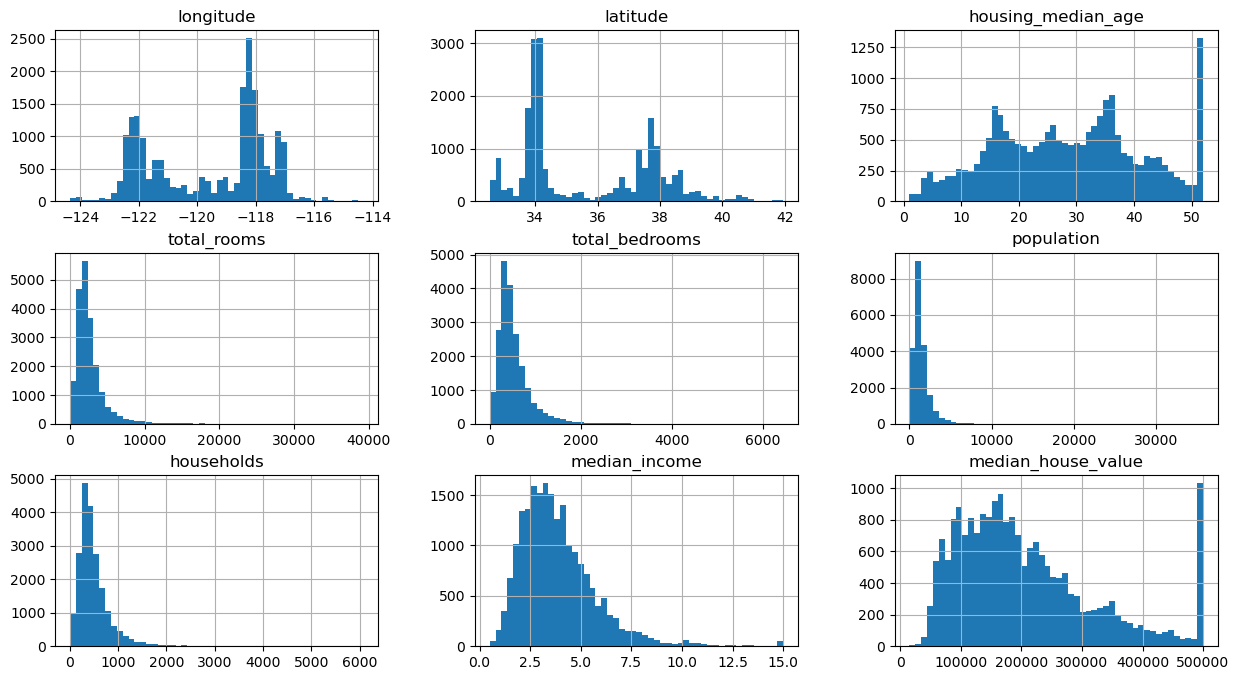

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (15,8))
plt.show()

## Test Set Generation

#### Using Our Own Function to Split Data into Test/Train Sets

In [12]:
import numpy as np

def shuffle_and_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split(housing, 0.2)
print(len(train_set))
print(len(test_set))

### Program will continue to generate new sets every time we run this function

16512
4128


#### Another way of Random Sampling Where Sets Stay Consistent

In [13]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

## Dataset doesn't have identifier column. Use row index as ID

housing_with_id = housing.reset_index() # This adds an index column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

#### Best Way is to Use Scikit-Learn train_test_split, and set random_state

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 10)

print(len(train_set))
print(len(test_set))

### This way, we can run the sample over and over again, and instances will stay consistent in train/test sets

16512
4128


### Using Stratified Sampling

#### Splitting the "Median Income" Feature into Various Categories (stratum)

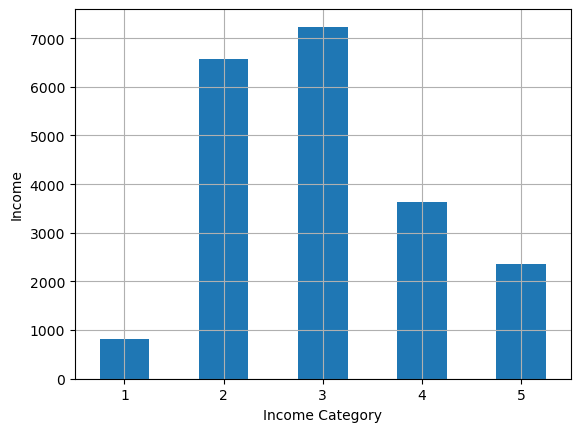

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1,2,3,4,5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income Category")
plt.ylabel("Income")
plt.show()

#### Generating 10 Different Stratified Splits of the Same Dataset

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 10)
stratified_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    stratified_splits.append([strat_train_set_n, strat_test_set_n])
    
### First Split
train_set, test_set = stratified_splits[0]

In [17]:
### Quicker Way: Use Train_Test_Split, and set stratify argument

strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"], random_state = 10)

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
### Test Set Generated using Stratified Sampling is nearly Identical to those in the full Dataset
# No need for income_cat column now. Drop the column

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## Exploring and Visualizing Data

In [21]:
housing = strat_train_set.copy()

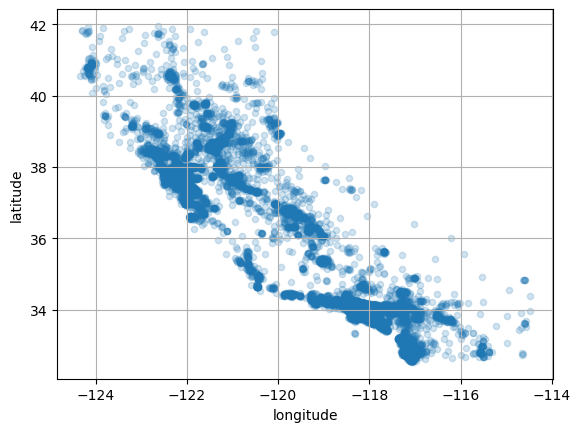

In [22]:
### Looking to see density of instances in California based on Longitude and Latitude
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
plt.show()

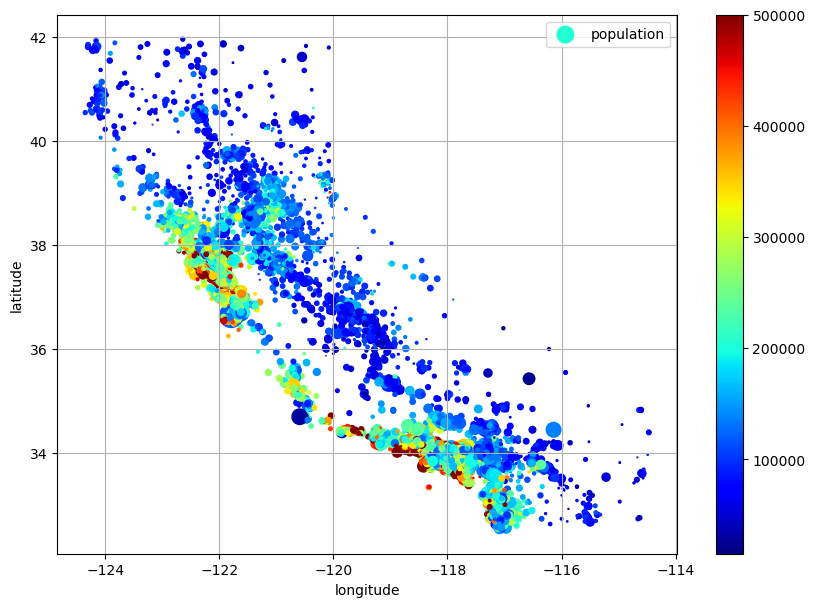

In [23]:
### Looking at housing prices in California.
### Size of circle (option 's') indicates districts population
### Color of circle (option 'c') indicates district median housing price
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, 
             s = housing["population"]/100, label = "population",
             c = housing["median_house_value"], cmap = "jet", 
             colorbar = True, legend = True, sharex = True, figsize = (10,7))
plt.show()

### You can see that housing prices are related to location and population density

### Correlation Coefficient

In [24]:
### We will check correlation between Median House Value and each feature by finding the correlation coefficient (r)
correlation_matrix = housing.corr()

In [25]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689222
total_rooms           0.128957
housing_median_age    0.101160
households            0.059776
total_bedrooms        0.043272
population           -0.027846
longitude            -0.046072
latitude             -0.143096
Name: median_house_value, dtype: float64

In [26]:
### Pretty high positive correlation between Median House Value and Median Income.
    ### As Median Income goes up, Median House Value tends to go up
### Slight negative correlation between Median house Value and Latitude
    ### As Latitude goes up (more north), Median House Value tends to slightly go down

#### Pandas scatter_matrix()

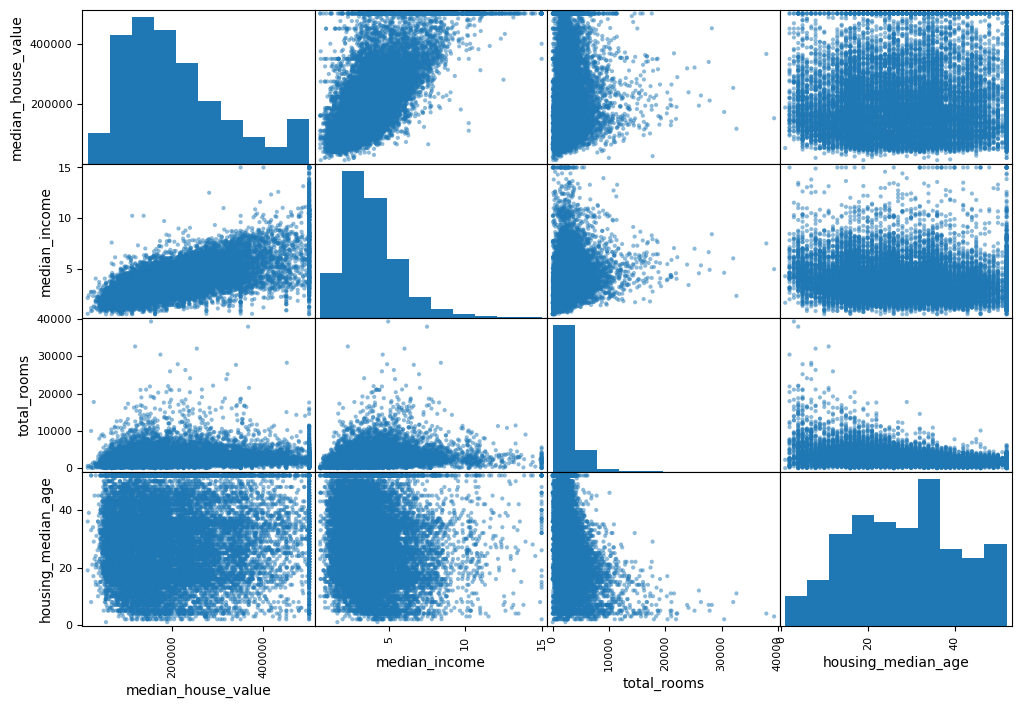

In [27]:
### scatter_matrix() is another way to calculate correlations. It plots correlations for 
    # every numerical attribute against eachother
### 11 numerical attributes, so there will be 11x11 = 121 plots. Focus on important attributes

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

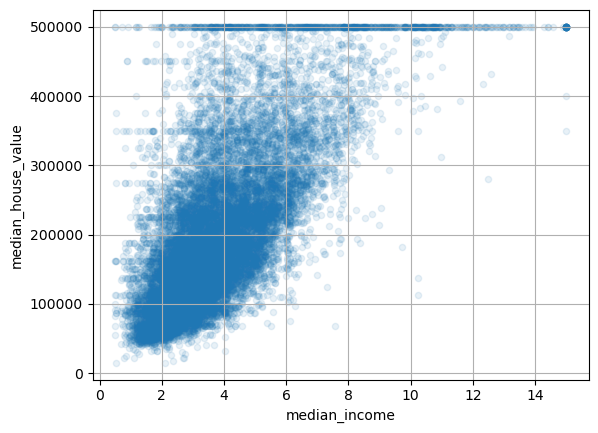

In [28]:
### The scatterplot between Median Income (x) and Median House Value (y) looks positive. Check this plot

housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, grid = True)
plt.show()

In [29]:
### Definitely a positive correlation, not very dispersed
### Looks as though the data for Median House Value is capped at $500,000 due to horizontal line at top
    # Possibly more horizontal lines at $$450,000 and $350,000. May need to remove values

### NOTE: Correlation Coefficient ONLY measures linear correlations

### Attribute Combinations

In [30]:
### Some attributes right now are irrelevant, but we can create new attributes to make them relevant
    # total_rooms -> Total rooms are irrelevant. We should get rooms per house
    # total_bedrooms -> Total bedrooms are irrelevant. We should get a ratio of bedrooms to total rooms
    # population -> Total population is irrelevant. We should get a number of people per household

In [31]:
# Rooms per Household
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# Bedrooms to Total Rooms ratio
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# Number of People per Household
housing["people_per_household"] = housing["population"] / housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.689222
rooms_per_household     0.148076
total_rooms             0.128957
housing_median_age      0.101160
households              0.059776
total_bedrooms          0.043272
people_per_household   -0.021860
population             -0.027846
longitude              -0.046072
latitude               -0.143096
bedroom_ratio          -0.258569
Name: median_house_value, dtype: float64

In [33]:
### Looks like there is a higher negative correlation between Median House Value and Bedroom Ratio than Total Bedrooms
    # As the ratio of bedrooms to rooms decreases, the median house value in the districts tends to increase
        # This shows that homes tend to be more expensive if they have a lower ratio of bedrooms to total rooms
        
### Looks like there is a higher positive correlation between Median House Value and Rooms per Household than Total Rooms
    # As the number of rooms per household increases, median house value in the districts tends to increase
        # This shows that homes tend to be more expensive if they have more rooms

### Preparing Data for Algorithm

In [34]:
husing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Cleaning Data

In [37]:
housing[housing["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedroom_ratio,people_per_household
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,NaN,2.542601
11777,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND,5.531481,NaN,2.629630
16967,-119.32,36.25,21.0,1231.0,NaN,609.0,206.0,2.8365,90000.0,INLAND,5.975728,NaN,2.956311
2455,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
15349,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,215100.0,<1H OCEAN,4.151458,NaN,4.532455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,-117.20,33.24,12.0,4992.0,NaN,2106.0,801.0,6.2079,307300.0,<1H OCEAN,6.232210,NaN,2.629213
5971,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.571135,NaN,2.254446
14777,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN,6.221719,NaN,3.031674
18751,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,5.460474,NaN,3.168972


In [38]:
### Looks like there are N/A values in total_bedrooms column. Use imputation to fill these values

In [39]:
### Scikit Learn SimpleImputer
### Imputer only works on numerical values. Create copy of dataset with only numerical attributes

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16400000e+03,  4.10000000e+02,  3.53245000e+00,
        1.79800000e+05,  5.22710316e+00,  2.03420003e-01,  2.81741500e+00])

In [41]:
housing_num.median().values

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16400000e+03,  4.10000000e+02,  3.53245000e+00,
        1.79800000e+05,  5.22710316e+00,  2.03420003e-01,  2.81741500e+00])

In [44]:
X = imputer.transform(housing_num)

In [45]:
### Other imputers in sklearn.impute package:
    # KNNImputer
    # IterativeImputer

In [46]:
housing_transformed = pd.DataFrame(X, columns = housing_num.columns, index =housing_num.index)

#### Text/Categorical Attributes

In [52]:
### ocean_proximity is a text attribute

housing_categorical = housing[["ocean_proximity"]]
housing_categorical.value_counts()

ocean_proximity
<1H OCEAN          7329
INLAND             5203
NEAR OCEAN         2147
NEAR BAY           1830
ISLAND                3
dtype: int64

In [56]:
### Convert these categories to numbers using Scikit Learn's OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)

housing_categorical_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
### Problem with this method -> Ocean Proximity is not ordinal
    # Ex) "NEAR OCEAN" is not similar to "NEAR BAY", but OrdinalEncoder will assume they are, since the values are adjacent
### OrdinalEncoder is good when categories are "good", "average", "bad", etc. But not here

### Use One-Hot Encoding instead
    # Assigns binary values in a matrix to attributes depending on category
        # Ex) if category is "INLAND" for a feature, One-Hot Encoding is as follows:
            # ([0,1,0,0,0])

In [59]:
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder()
housing_categorical_1hot = categorical_encoder.fit_transform(housing_categorical)

In [62]:
housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
housing_categorical_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [64]:
categorical_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Scaling

In [65]:
### Can use either Min-Max Scaling, or Standardization

#### Min-Max Scaling

In [68]:
### Values are put on a scale from [0,1]. We will change the scale from [-1,1]. (Mean of 0 works best for most models)

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

#### Standardization

In [69]:
### Subtracts mean and divides by Standard Deviation. Standardization is less affected by outliers
### Use Scikit Learn's StandardScaler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_num)

In [70]:
### Note: before scaling data, try to transform the data to resemble a Gaussian (Normal) relationship
    # May need to use the square root, or logarithm of data values to do this, then scale the data
### Can also bucketize the feature if it is heavily skewed